# 튜토리얼 목차
1. 자연어 처리란? 
2. NLP Preprocessing 
## 3. Vectorization <<
<br>
4. Embedding 
5. Modeling
***

# Vectorization이란? 
- NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것을 말한다. 이 때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary라 하며, 이것이 크면 클수록 학습이 오래 걸리게 된다. 다양한 벡터화 함수들이 존재하지만 이번 노트북에서는 가장 기본적이며 많이 쓰이는 세 가지를 소개한다. 
- 이전 노트북에서 소개했던 것과 마찬가지로 토큰들을 벡터화하기 이전에 형태소 분석기를 사용하여 문장을 원하는 토큰들로 분리한다. 자세한 내용은 [이전 노트북]()을 참고.
<br>

Ex) 자연어 처리는 정말 즐거워. 즐거운 자연어 처리 다같이 해보자. <br>

의 문장들을 간단한 전처리와 okt를 활용하여 나누어보자. 

In [2]:
from konlpy.tag import Okt
import re

okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]', ' ', sentence) # 간단한 전처리
    token = (okt.morphs(sentence)) # 형태소 분석기를 이용한 토큰 나누기
    tokens.append(' '.join(token))
    
print("형태소 단위로 문장 분리")
print("+++++++++++++++++++++++")
print(tokens)

형태소 단위로 문장 분리
+++++++++++++++++++++++
['자연어 처리 는 정말 정말 즐거워', '즐거운 자연어 처리 다 같이 해보자']


## 1. One Hot Encoding 
- 두번째 노트북에서 설명했던 방식이 바로 one-hot-encoding이다. 해당 단어가 존재하면 1, 그렇지 않으면 모두 0으로 표시되는 기법이다. keras를 이용하면 쉽게 구현이 가능하며, texts_to_sequences를 활용해 각 토큰에 고유한 정수를 부여한 후 to_categorical을 활용하면 간단하게 구현이 가능하다.

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("============================")
print(t.word_index)
print(" ")

s1 = t.texts_to_sequences(tokens)[0]
print("부여된 정수로 표시된 문장1")
print("============================")
print(s1)
print(" ")

s2 = t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("============================")
print(s2)
print(" ")

s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("============================")
print(s1_one_hot)
print(" ")

s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("============================")
print(s2_one_hot)
print(" ")


각 토큰에게 고유의 정수 부여
{'자연어': 1, '처리': 2, '정말': 3, '는': 4, '즐거워': 5, '즐거운': 6, '다': 7, '같이': 8, '해보자': 9}
 
부여된 정수로 표시된 문장1
[1, 2, 4, 3, 3, 5]
 
부여된 정수로 표시된 문장2
[6, 1, 2, 7, 8, 9]
 
문장1의 one-hot-encoding
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
 
문장2의 one-hot-encoding
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
 


- 하지만 이 방식은 vocabulary 크기가 커짐에 따라 많은 공간을 차지하게 되고 벡터가 굉장히 sparse(희소)해지기 때문에 좋은 특성을 알려주지 못하는 경우가 대부분이다. 

## 2. Count vectorization
- 이 방식은 vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해준다. 아래 예시를 통해 알아보자. 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) # 반드시 여러 개의 문장을 넣어줘야만 작동한다!!

print(vectorizer.get_feature_names())
print(vectors.toarray())

['같이', '자연어', '정말', '즐거운', '즐거워', '처리', '해보자']
[[0 1 2 0 1 1 0]
 [1 1 0 1 0 1 1]]


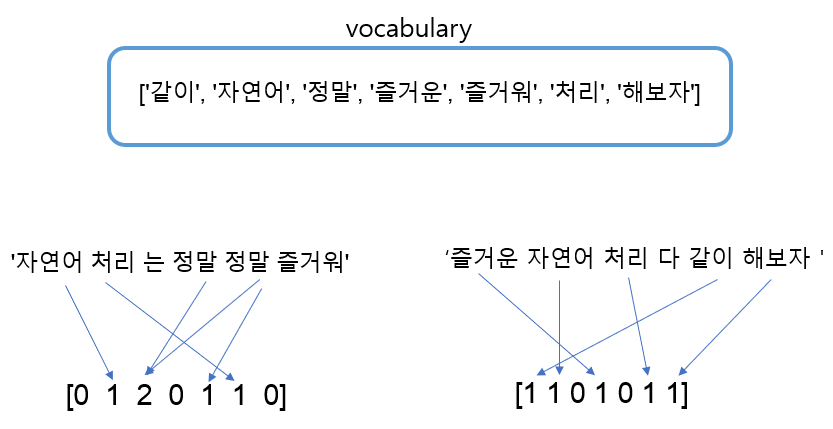
- 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있다. 아쉬운 점은 sklearn의 CountVectorizer는 한 글자를 자동으로 제거해준다는 점이다.
- 또한, 이 부분에서 형태소 분석기의 중요성에 대해서 알 수 있다. '즐거운'과 '즐거워'는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리가 되었다. 이는 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미한다. 

## 3. Tfldf

- Tfldf의 핵심은 다음 두 가지이다.

    
1. 단어가 몇 번 등장했는지에 대한 정보
2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데 있어서 중요한 단어임  

즉, 등장 횟수가 많고 문서 분별력 있는 단어들을 점수화하여 벡터화한 것이 Tfldf 기법이다.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens)

# tf-idf dictionary
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

['같이', '자연어', '정말', '즐거운', '즐거워', '처리', '해보자']
[[0.         0.29017021 0.81564821 0.         0.4078241  0.29017021
  0.        ]
 [0.49922133 0.35520009 0.         0.49922133 0.         0.35520009
  0.49922133]]


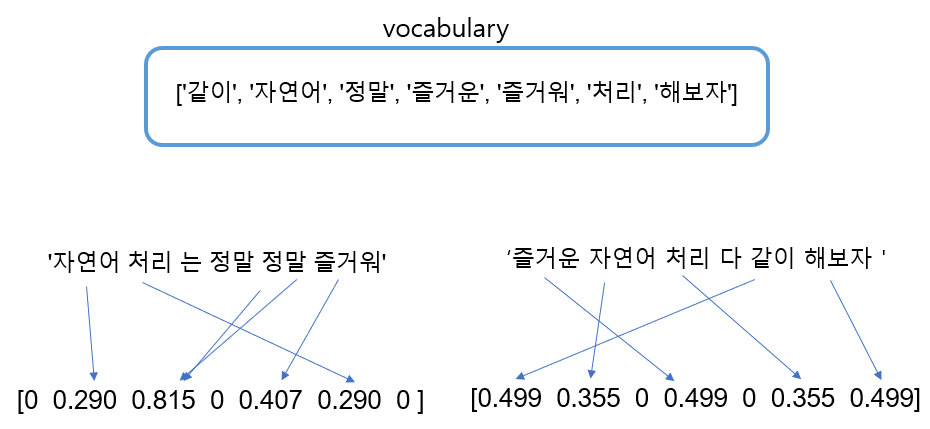
- 이번 문서에서는 수식적인 부분을 제외하고 코드 위주의 결과를 공유한다. Count Vectorization과 동일한 방법이지만 단어들에 대한 가중치가 다르게 표시된다. TfIdf에 대한 상세한 내용은 [다음 링크](https://donghwa-kim.github.io/TFIDF.html)를 참고하라.

***

## 4. Padding 
- 여기서 우리는 한 가지 궁금증을 가질 수 있다. 우리가 사용하던 모델들은 DataFrame 형식의 row별 동일한 column 수를 갖는데, NLP에서는 row별(문장별) column(토큰의 개수)가 같지 않다도 되는건가? 가변 길이의 문장들을 입력으로 넣어도 된다고?? 
- 음, 가변 길이의 입력을 받는 모형들이 존재하지만 아쉽게도 기본적으로는 문장의 길이를 동일하게 맞춰줘야 한다. 문장의 길이를 맞춰주기 위해 부족한 길이만큼 0을 채워넣게 되는데 우리는 이것을 Padding이라고 한다.
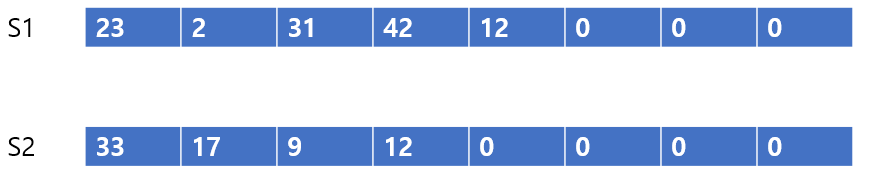
- 위의 예시와 같이 문장 S1의 길이와 S2의 길이가 서로 다를 때 뒷쪽에 0을 padding 해 같은 길이로 맞춰준다. padding은 keras에서 한 줄로 구현이 가능하며 대회 적용 코드에서 살펴보도록 한다.
***

## 5. 대회 적용
- 아래 코드는 대회에 바로 적용이 가능한 코드이다. 특별한 vetorization 기법을 사용하지 않고 keras의 text_to_sequences를 통한 정수화만 진행해 주어도 높은 정확도를 얻을 수 있다. 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):
    
    tokenizer = Tokenizer()# keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(train_text) # train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(train_text) # 각 토큰들에 정수 부
    vocab_size = len(tokenizer.word_index) + 1 # 모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size :', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen=max_len) # 설정한 문장의 최대 길이만큼 padding
    
    return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer = text2sequence(train['text'], max_len=100)

이제 바로 모델에 넣고 훈련을 시작하면 되는 것일까?
유감스럽게도 아직이다. 이번에 살펴본 vectorization 방법들은 치명적인 단점을 가지고 있다. 

이 문제를 해결해 주는 것이 바로 Embadding이다. 
모델링 전까지 험난한 여정의 NLP 전처리! Embedding으로 이어진다. 